In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import pickle
from pathlib import Path
from sklearn.metrics import r2_score

In [2]:
ROOT_DIR = os.path.dirname(
os.path.dirname(str(Path(os.path.abspath('')).absolute())))

# Load Model

In [3]:
TARGET_NAME = "log_delta_E/"
ENCODING_NAME = "atomic/"
MODEL_NAME = "random_forest_model.pkl"

In [4]:
MODELS_DIR = os.path.join(
    str(Path(os.path.abspath('')).parent.parent.absolute()), "models", TARGET_NAME, ENCODING_NAME
)

In [5]:
with open(MODELS_DIR + MODEL_NAME, 'rb') as file:
    model = pickle.load(file)

# Load Data Sets

In [6]:
X_TRAIN_NAME = "X_train.csv"
y_TRAIN_NAME = "y_train.csv"

In [7]:
X_train = pd.read_csv(os.path.join(MODELS_DIR, "datasets", X_TRAIN_NAME), index_col=0)
y_train = pd.read_csv(os.path.join(MODELS_DIR, "datasets", y_TRAIN_NAME), index_col=0)

In [8]:
X_TEST_NAME = "X_Structure gen..csv"
y_TEST_NAME = "y_Structure gen..csv"

In [9]:
X_test = pd.read_csv(MODELS_DIR + "/datasets/" + X_TEST_NAME, index_col=0)
y_test = pd.read_csv(MODELS_DIR + "/datasets/" + y_TEST_NAME, index_col=0)

In [10]:
X_test.describe()

,ecutrho,k_density,ecutwfc,Ag,Al,Ar,As,Au,B,Ba,...,Tl,Tm,V,W,Xe,Y,Yb,Zn,Zr,total_atoms
count,51563.000000,51563.000000,51563.000000,51563.000000,51563.000000,51563.0,51563.0,51563.000000,51563.000000,51563.000000,...,51563.000000,51563.0,51563.000000,51563.000000,51563.0,51563.000000,51563.000000,51563.000000,51563.000000,51563.0
mean,243.580474,5.899967,56.071990,0.018657,0.006371,0.0,0.0,0.025464,0.010967,0.000204,...,0.021731,0.0,0.006245,0.006284,0.0,0.018657,0.012199,0.031622,0.028722,2.0
std,89.808265,2.822469,23.675401,0.094765,0.056079,0.0,0.0,0.109926,0.073235,0.010088,...,0.101948,0.0,0.055529,0.055699,0.0,0.094765,0.077140,0.121701,0.116346,0.0
min,100.000000,2.000000,20.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0
25%,180.000000,4.000000,35.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0
50%,260.000000,6.000000,55.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0
75%,340.000000,8.000000,75.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0
max,380.000000,10.000000,100.000000,0.500000,0.500000,0.0,0.0,0.500000,0.500000,0.500000,...,0.500000,0.0,0.500000,0.500000,0.0,0.500000,0.500000,0.500000,0.500000,2.0


In [11]:
pred_trees_train = np.array([estimator.predict(X_train) for estimator in model.estimators_]).T

In [12]:
y_pred_train = model.predict(X_train)

In [13]:
np.allclose(np.mean(pred_trees_train, axis=1), y_pred_train)

True

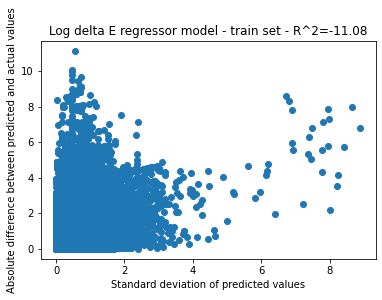

In [14]:
y_pred_train_std = np.std(pred_trees_train, axis=1)
y_dev_train = np.abs(y_pred_train - y_train.values.squeeze())
plt.xlabel("Standard deviation of predicted values")
plt.ylabel("Absolute difference between predicted and actual values")
plt.title(f"Log delta E regressor model - train set - R^2={r2_score(y_pred_train_std, y_dev_train):.2f}")
plt.scatter(y_pred_train_std, y_dev_train)

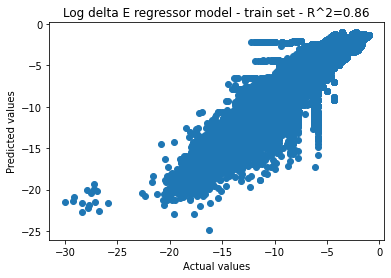

In [15]:
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title(f"Log delta E regressor model - train set - R^2={r2_score(y_pred_train, y_train.values.squeeze()):.2f}")
plt.scatter(y_pred_train, y_train.values.squeeze())

In [16]:
pred_trees_test = np.array([estimator.predict(X_test) for estimator in model.estimators_]).T

In [17]:
y_pred_test = model.predict(X_test)

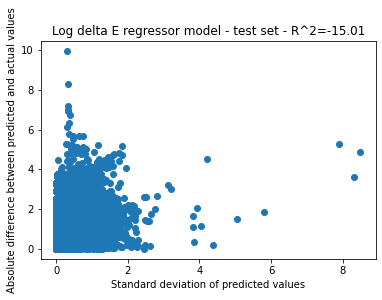

In [18]:
y_pred_test_std = np.std(pred_trees_test, axis=1)
y_dev_test = np.abs(y_pred_test - y_test.values.squeeze())
plt.xlabel("Standard deviation of predicted values")
plt.ylabel("Absolute difference between predicted and actual values")
plt.title(f"Log delta E regressor model - test set - R^2={r2_score(y_pred_test_std, y_dev_test):.2f}")
plt.scatter(y_pred_test_std, y_dev_test)

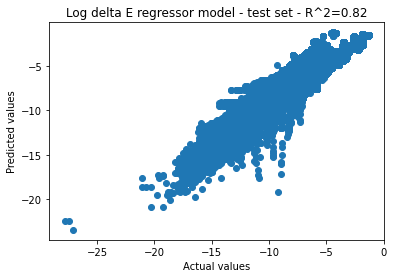

In [19]:
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title(f"Log delta E regressor model - test set - R^2={r2_score(y_pred_test, y_test.values.squeeze()):.2f}")
plt.scatter(y_pred_test, y_test.values.squeeze())